In [6]:
import numpy as np
import pandas as pd
import math
from functools import reduce
from matplotlib import pyplot as plt

# Birthday Pair Problem Solutions

You may ignore leap days for the following questions.

### Question 1. Birthday Pairings.

**_You are throwing a party and inviting random people you have never met. What's the fewest number of people you need to invite to have at least 50% probability that two strangers will have the same birthday? (Birth year need not match.)_**

This problem can be solved by thinking about the complementary case: what is the probability that we DO NOT have two people with matching birthdays?  That would mean that each person has to have their own unique birthday.  Think about the party goes arriving at the party... the first person's birthday can be any day, but after that each new person who arrives has a more and more limited number of possible birthdays to ensure that each person's birthday is unique.  The probably that $r$ people have unique birthdays is:

$$ 1 \cdot \frac{N-1}{N} \cdot \frac{N-2}{N} \cdot \frac{N-3}{N} \cdots \frac{N-r+1}{N} = \frac{N!}{(N-r)!N^r}.$$

where $N$ is the number of days in a year ($N=365$ here on Earth) in the year and $r$ is the number of people we invite to our party.

Therefore, the probability that at least two people will have a shared birthday is just the compliment of this expression, so we are now required to find $r$ such that:

$$1 - \frac{N!}{(N-r)!N^r} > \frac{1}{2}$$

Let's build a function to help us evaluate the left-hand side of the above equation.

In [75]:
def prob_birthday_success(r, N=365):
    ''' Calculates the probability that two people will share the same birthday.
    
        Inputs:  r - the number of people considered.
                 N - the number of days in the year. Defaults to 365 days per year.
        Outputs: probability of finding two people with the same birthday.
        
        Requires r and N to be integers; requires r >= 2 and N >= 1.
        If the number of people r is bigger than the number of days N, return a probability of 1.
        Remainder of code relies on our analytic solution to arrive at answer.  
        First computes the factorial, N!/(N-r)!, and the power, N^r, before returning the success probability.
    '''
    assert int(r) == r
    assert int(N) == N
    assert r >= 2
    assert N >= 1
    
    if r > N: return 1.
    
    factorial = reduce(lambda x, y: x*y, range(N-r+1, N+1))
    power = N**r
    return (1 - factorial/power)

Now that we have the above formula, we can plot how the probability changes as a function of the number of people invited to the party, $r$.

In [76]:
MAX_R = 65

Text(0,0.5,'Probability of Birthday Pair')

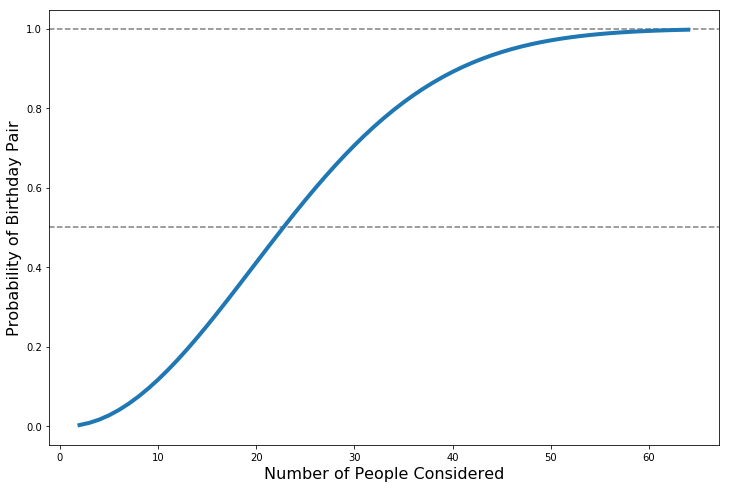

In [77]:
plt.figure(figsize=(12,8))

plt.plot(range(2, MAX_R), [prob_birthday_success(x) for x in range(2, MAX_R)], 
         linewidth=4, zorder=10)

plt.axhline(0.5, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.xlabel('Number of People Considered', fontsize=16)
plt.ylabel('Probability of Birthday Pair', fontsize=16)

In [78]:
prob_birthday_success(23)

0.5072972343239854

In [79]:
prob_birthday_success(60)

0.994122660865348

If you invite 23 people to your party, you have a 50% probability that 2 people will share the same birthday, and inviting 60 people pretty much guarantees it.

### Question 2. Finding Your Birthmate.
**_You want to find someone whose birthday matches yours. How many strangers do you need to ask to have a 50-50 chance of matching?_**

Again, we can think about the opposite case... what is the probability that everyone you meet has a different birthday than you?  (Note: now people do not need to have unique birthdays.  They just can't have YOUR birthday.)

$$ \frac{N-1}{N} \cdot \frac{N-1}{N} \cdots \frac{N-1}{N} = \left(\frac{N-1}{N}\right)^n $$

where $N$ is still the number of days in the year and $n$ is now the number of people you must ask.

So we must evaluate the compliment.  Find $n$ such that:

$$1 - \left(\frac{N-1}{N}\right)^n > \frac{1}{2}.$$

This expression is a bit nicer to solve.  After introducting logarithms and shifting quantities around a bit, we determine:

$$n > \frac{\log\left(\frac{1}{2}\right)}{\log\left(\frac{N-1}{N}\right)}.$$

Substituting $N=365$ in above tells us that to have at least a 50% chance of meeting our birthmate we must ask at least:

In [80]:
N = 365

In [81]:
np.ceil(math.log(0.5)/math.log((N-1)/N))     #Round up to the nearest whole person

253.0

...253 people.  That's a much bigger party that what was required for Question 1!

### Question 3. Birthday Holidays.
**_An up-and-coming tech start-up has developed a novel time-off policy: the CEO gives all the workers a holiday whenever one of them has a birthday. Other than these birthday-holidays, they are expected to work 365 days a year. The CEO wants to maximize the expected number of total worker-days completed per year at the company. How many people should the CEO hire? (Note: the CEO's birthday is not considered a holiday.)_**

In this more challenging question, we want to know how many people to hire to maximize the worker-days completed.  Think about the first day of the year.  The workers only work if no one has a birthday.  The probability that the any individual worker does not have a birthday on the first day of the year is (N-1)/N.  To find the probability that NO ONE has this birthday, we multiply $w$ distinct events:

$$ \frac{N-1}{N} \cdot \frac{N-1}{N} \cdots \frac{N-1}{N} = w\left(\frac{N-1}{N}\right)^w.$$

It turns out that the above equation is true for any individual calendar day.  So the number of worker-days completed looks like:

$$ w\left(\frac{N-1}{N}\right)^w + w\left(\frac{N-1}{N}\right)^w + \cdots + w\left(\frac{N-1}{N}\right)^w = wN\left(\frac{N-1}{N}\right)^w $$

where there are $N$ calendar days in a year.

We must now find $w$ that maximizes this expression.  How do we optimize equations?  Well, derivatives definitely work!  Taking the derivative and setting it equal to zero, we find:

$$\frac{\text{d}}{\text{d}w} \left[wN\left(\frac{N-1}{N}\right)^w\right] = N\left(\frac{N-1}{N}\right)^w + wN\log{\left(\frac{N-1}{N}\right)} \left(\frac{N-1}{N}\right)^w = 0 $$

Solving this leads us eventually leads us to:

$$ w = \left(\log{\left(\frac{N}{N-1}\right)}\right)^{-1},  $$

so $w$ can be evaluated as:

In [82]:
1/math.log(N/(N-1))

364.4997713762012

Thus we should hire 364 workers.  (We might as well round down since both 364 and 365 are roughly the same and that way we save paying the $365^\text{th}$ man.)

Hiring 364 workers ensures that 

In [83]:
w = 364

In [84]:
w*N*((N-1)/N)**w

48943.52380535132

roughly 49,000 worker-days are completed per year.